<strong>Population</strong>: entire data set is population. <br>
<strong>Sample</strong>: a subset of the population. <br>
Let $X$ is a population and $x$ is a sample of $X$, $x=\{x_1, x_2, ..., x_n\}$ and $x_i$ is a record or an observation <br>

normal distribution: Gaussian function 

<strong>Probability density function</strong>: give you the
probability of a data point falling within some given range of a given
value.

<strong>Probability mass function</strong>: $P[X=k]$ is the
probabilities of given discrete values occurring in a data set.


# Mean, Median, Mode

<strong>Mean</strong> (average) of $x$: $\bar{x}=\dfrac{\Sigma^n_{i=1} x_i}{n}$ <br>
<strong>Median</strong> of $x$: short the value and take the value at the middle. And if you have an even number of samples, take the average of the two in the middle. Mean is less susceptible than median. <br>
<strong>Mode</strong> of $x$: the most common value in a data set

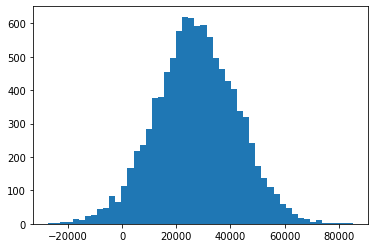

ModeResult(mode=array([40]), count=array([15]))

In [1]:
import numpy as np

# Generate a data of 10000 points of incomes
incomes = np.random.normal(27000, 15000, 10000) # center, standard deviation, data points
np.mean(incomes)

%matplotlib inline
import matplotlib.pyplot as plt

# segment the income data into 50 buckets, and plot it as a histogram
plt.hist(incomes, 50)
plt.show()

# compute median
np.median(incomes)

# add an outlier
incomes = np.append(incomes, [1000000000])
np.median(incomes)

# compute median
np.mean(incomes)

# Generate 500 points data for age of peoples
ages = np.random.randint(18, high=90, size=500)
from scipy import stats

# Compute mode
stats.mode(ages)

# Standard Deviation and Variance

<strong>Variance</strong> (squared variance): $\sigma^{2}$ measures how "spread-out" the data is, $\sigma^{2}=\frac{\Sigma_i\left(x_{i}-\bar{x}\right)^{2}}{|x|}$ where $|x|$ is sample size. 

<strong>Population variance</strong>: $\sigma^{2}=\frac{\sum(x_{i}-\bar{X})^{2}}{N}$

<strong>Sample variance</strong>: $\sigma^{2}=\frac{\sum(x_{i}-\bar{x})^{2}}{N-1}$

<strong>Standard deviation</strong>: $\sigma = \sqrt{\sigma^2}$. It is usually used as a way to identify outlier. $x_{i_{0}}-\bar{x}>\sigma$ can be considered unusual. You can talk about how extreme a data is by talking about how many sigmas away from the mean it is. 

\href{https://en.wikipedia.org/wiki/Standard_deviation#/media/File:Standard_deviation_diagram.svg}{pic}

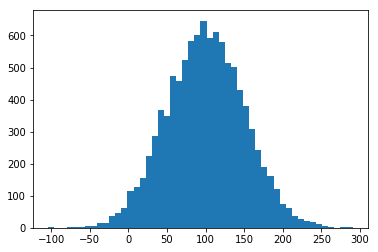

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 50.0, 10000)

plt.hist(incomes, 50)
plt.show()

# Compute variance 
incomes.var()

# Compute standard deviation
incomes.std()

<strong>Percentiles</strong>: a percentile p-th is the point $x_{p}\in x$ that p% of x are less than $x_{p}$. 

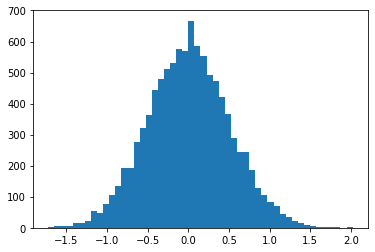

-0.41973681028821197

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

# percentile 50th is equivalent to median
np.percentile(vals, 50)
np.percentile(vals, 90)
np.percentile(vals, 20)


## Moments: Mean, Variance, Skew, Kurtosis

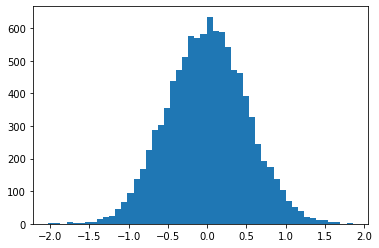

-0.034698505357049214

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()


np.mean(vals)
np.var(vals)
import scipy.stats as sp
sp.skew(vals)

sp.kurtosis(vals)

Understanding skew: change the normal distribution to be centered around 10 instead of 0, and see what effect that has on the moments.

The skew is still near zero; skew is associated with the shape of the distribution, not its actual offset in X.

The first moment is the mean; this data should average out to about 0:
The second moment is the variance:
The third moment is skew - since our data is nicely centered around 0, it should be almost 0:
The fourth moment is "kurtosis", which describes the shape of the tail. For a normal distribution, this is 0:


## Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:


In [ ]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [ ]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

In [ ]:
numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [ ]:
np.corrcoef(pageSpeeds, purchaseAmount)

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

In [ ]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

# Conditional Probability and Bayes Theorem's:

$P(A,B)$: probability of A,B both occurring. <br>
$P(B|A)$: probaility of B given that A has occurred <br>
$P(B|A)=\frac{P(A,B)}{P(B)}$ <br>
<strong>Bayes Theorem's</strong>: $P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

# Functions:

Probability density function: give you the probability of a data point falling within some given range of a given value. <br>
Probability mass function: P[X=k] is the probabilities of given discrete values occurring in a data set.